<a href="https://colab.research.google.com/github/felipesembay/portfolio/blob/main/An%C3%A1lise_Fundamentalista_Completo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Baixando dados dos balanços das empresas listadas na Bolsa**

## *Configurações Iniciais*

In [2]:
!pip install -q kora

     |████████████████████████████████| 57 kB 2.8 MB/s 
     |████████████████████████████████| 56 kB 4.4 MB/s 


In [9]:
!pip install git+https://github.com/quantopian/pyfolio
!pip install yfinance 
!pip install pulp


  Cloning https://github.com/quantopian/pyfolio to /tmp/pip-req-build-xevnzlbd
  Running command git clone -q https://github.com/quantopian/pyfolio /tmp/pip-req-build-xevnzlbd
     |████████████████████████████████| 52 kB 1.1 MB/s 
  Created wheel for pyfolio: filename=pyfolio-0.9.2+75.g4b901f6-py3-none-any.whl size=75775 sha256=2a4af4fd3c520df4fbebb27881f4674ac9e45e56f3723637f45837ed24ea9b6c
  Stored in directory: /tmp/pip-ephem-wheel-cache-gx5h56ds/wheels/2d/aa/24/c99ed55ef37c69e33815248c1622cdb81b65ec753868004c28
  Created wheel for empyrical: filename=empyrical-0.5.5-py3-none-any.whl size=39777 sha256=e1db9eb9c0971ab7879b4c4aab0d08652b0c3fbe93feefa2aacf59edcc0331cd
  Stored in directory: /root/.cache/pip/wheels/d9/91/4b/654fcff57477efcf149eaca236da2fce991526cbab431bf312
Successfully built pyfolio empyrical
     |████████████████████████████████| 6.3 MB 7.8 MB/s 
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully 

     |████████████████████████████████| 41.2 MB 1.4 MB/s 


In [10]:
import yfinance as yf
import pandas_datareader.data as web
yf.pdr_override()
import pulp as p

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
import pyfolio as pf
import warnings
warnings.filterwarnings('ignore')


/usr/local/lib/python3.7/dist-packages/pyfolio/pos.py:27: UserWarning: Module "zipline.assets" not found; multipliers will not be applied to position notionals.
  'Module "zipline.assets" not found; multipliers will not be applied'


## Vamos Raspar o site da B3 para conseguir a composição do Indice Bovespa. 

In [13]:
from kora.selenium import wd

from google.colab.data_table import DataTable
from time import sleep

In [14]:
def busca_carteira_teorica(indice, espera=8):
  url = f'https://sistemaswebb3-listados.b3.com.br/indexPage/day/{indice.upper()}?language=pt-br'
  wd.get(url)
  sleep(espera)

  wd.find_element_by_id('segment').send_keys("Setor de Atuação")
  sleep(espera)

  wd.find_element_by_link_text("Download").click()
  sleep(espera)

  arquivos = !ls -1t *.csv
  return pd.read_csv(arquivos[0], sep=';', encoding='ISO-8859-1', skipfooter=2, engine='python', thousands='.', decimal=',', header=1, index_col=False)

In [15]:
ibov = busca_carteira_teorica('ibov')
ibov

,Setor,Código,Ação,Tipo,Qtde. Teórica,Part. (%),Part. (%)Acum.
0,Bens Indls / Máqs e Equips,WEGE3,WEG,ON NM,1484859030,2.445,2.445
1,Bens Indls / Mat Transporte,EMBR3,EMBRAER,ON NM,734558205,0.737,0.737
2,Bens Indls/Transporte,AZUL4,AZUL,PN N2,327741172,0.391,2.407
3,Bens Indls/Transporte,CCRO3,CCR SA,ON NM,1115693556,0.652,2.407
4,Bens Indls/Transporte,ECOR3,ECORODOVIAS,ON NM,339237914,0.143,2.407
...,...,...,...,...,...,...,...
87,Utilidade Públ / Energ Elétrica,ENGI11,ENERGISA,UNT N2,248542219,0.573,6.311
88,Utilidade Públ / Energ Elétrica,ENEV3,ENEVA,ON NM,1261568398,0.914,6.311
89,Utilidade Públ / Energ Elétrica,EGIE3,ENGIE BRASIL,ON NM,255217329,0.504,6.311
90,Utilidade Públ / Energ Elétrica,EQTL3,EQUATORIAL,ON NM,1010511085,1.170,6.311


In [16]:
#Fundos Imobiliários 
ifix = busca_carteira_teorica('ifix')
ifix

,Setor,Código,Ação,Tipo,Qtde. Teórica,Part. (%),Part. (%)Acum.
0,Financ e Outros / Fundos,BPFF11,FII ABSOLUTO,CI,4492326,0.274,100.0
1,Financ e Outros / Fundos,ALZR11,FII ALIANZA,CI ER,5926910,0.615,100.0
2,Financ e Outros / Fundos,ARCT11,FII ARCTIUM,CI,3597567,0.361,100.0
3,Financ e Outros / Fundos,AIEC11,FII AUTONOMY,CI,4825000,0.341,100.0
4,Financ e Outros / Fundos,BARI11,FII BARIGUI,CI,4634191,0.470,100.0
...,...,...,...,...,...,...,...
98,Financ e Outros / Fundos,XPLG11,FII XP LOG,CI,27101061,2.457,100.0
99,Financ e Outros / Fundos,XPCM11,FII XP MACAE,CI,2414570,0.047,100.0
100,Financ e Outros / Fundos,XPML11,FII XP MALLS,CI ER,23807124,2.126,100.0
101,Financ e Outros / Fundos,XPPR11,FII XP PROP,CI,7316171,0.420,100.0


In [17]:
DataTable(ibov)

,Setor,Código,Ação,Tipo,Qtde. Teórica,Part. (%),Part. (%)Acum.
0,Bens Indls / Máqs e Equips,WEGE3,WEG,ON NM,1484859030,2.445,2.445
1,Bens Indls / Mat Transporte,EMBR3,EMBRAER,ON NM,734558205,0.737,0.737
2,Bens Indls/Transporte,AZUL4,AZUL,PN N2,327741172,0.391,2.407
3,Bens Indls/Transporte,CCRO3,CCR SA,ON NM,1115693556,0.652,2.407
4,Bens Indls/Transporte,ECOR3,ECORODOVIAS,ON NM,339237914,0.143,2.407
...,...,...,...,...,...,...,...
87,Utilidade Públ / Energ Elétrica,ENGI11,ENERGISA,UNT N2,248542219,0.573,6.311
88,Utilidade Públ / Energ Elétrica,ENEV3,ENEVA,ON NM,1261568398,0.914,6.311
89,Utilidade Públ / Energ Elétrica,EGIE3,ENGIE BRASIL,ON NM,255217329,0.504,6.311
90,Utilidade Públ / Energ Elétrica,EQTL3,EQUATORIAL,ON NM,1010511085,1.170,6.311


In [18]:
! pip install -U plotly

     |████████████████████████████████| 25.3 MB 1.7 MB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


In [19]:
import plotly.express as px

In [20]:
ibov['SubSetor'] = ibov['Setor'].apply(lambda s: s[s.rfind("/")+1:].strip())
ibov['Setor'] = ibov['Setor'].apply(lambda s: s[:s.rfind("/")].strip())


In [21]:
ibov

,Setor,Código,Ação,Tipo,Qtde. Teórica,Part. (%),Part. (%)Acum.,SubSetor
0,Bens Indls,WEGE3,WEG,ON NM,1484859030,2.445,2.445,Máqs e Equips
1,Bens Indls,EMBR3,EMBRAER,ON NM,734558205,0.737,0.737,Mat Transporte
2,Bens Indls,AZUL4,AZUL,PN N2,327741172,0.391,2.407,Transporte
3,Bens Indls,CCRO3,CCR SA,ON NM,1115693556,0.652,2.407,Transporte
4,Bens Indls,ECOR3,ECORODOVIAS,ON NM,339237914,0.143,2.407,Transporte
...,...,...,...,...,...,...,...,...
87,Utilidade Públ,ENGI11,ENERGISA,UNT N2,248542219,0.573,6.311,Energ Elétrica
88,Utilidade Públ,ENEV3,ENEVA,ON NM,1261568398,0.914,6.311,Energ Elétrica
89,Utilidade Públ,EGIE3,ENGIE BRASIL,ON NM,255217329,0.504,6.311,Energ Elétrica
90,Utilidade Públ,EQTL3,EQUATORIAL,ON NM,1010511085,1.170,6.311,Energ Elétrica


In [22]:
ibov.to_csv('dados_setores.csv')

In [23]:
ibov['Setor'].unique()

array(['Bens Indls', 'Cons N  Básico', 'Cons N Cíclico',
       'Consumo Cíclico', 'Diverso', 'Financ e Outros',
       'Financeiro e Outros', 'Mats Básicos', 'Petróleo', 'Saúde',
       'Tec.Informação', 'Telecomunicaçã', 'Utilidade Públ'], dtype=object)

In [24]:
ibov['SubSetor'].unique()

array(['Máqs e Equips', 'Mat Transporte', 'Transporte',
       'Alimentos Processados', 'Bebidas', 'Comércio Distr.',
       'Pr Pessoal Limp', 'Comércio', 'Tecid Vest Calç', 'Constr Civil',
       'Viagens e Lazer', 'Diversos', 'Explor Imóveis', 'Interms Financs',
       'Previd  Seguros', 'Serviços Financeiros Diversos',
       'Madeira e Papel', 'Mineração', 'Químicos', 'Sid Metalurgia',
       'Gás e Biocombustíveis', 'SM Hosp An.Diag', 'Programas Servs',
       'Telecomunicação', 'Água Saneamento', 'Energ Elétrica'],
      dtype=object)

In [25]:
def conserta_setores(setor):
  if setor == "Cons N  Básico" or setor == "Cons N Cíclico": return "Consumo Não-Cíclico"
  if setor == "Financ e Outros" or setor == "Financeiro e Outros": return "Financeiro"
  else: return setor

In [26]:
ibov['Setor'] = ibov['Setor'].apply(conserta_setores)

In [27]:
fig = px.sunburst(data_frame=ibov, path=['Setor', 'SubSetor', 'Código'], values='Part. (%)', height=900)

fig.update_traces(hovertemplate='<b>%{label}:</b> %{value:.2f}%')

fig.show()

# **Obtendo e Tratando Dados**

In [28]:
tickers = {'ITUB4.SA', 'BBDC4.SA', 'VALE3.SA','PETR4.SA', 'PETR3.SA', 'JBSS3.SA','ABEV3.SA','MGLU3.SA','GNDI3.SA','WEGE3.SA','RENT3.SA','^BVSP'}
up = web.get_data_yahoo(tickers, start='2019-01-01')['Adj Close']

[*********************100%***********************]  12 of 12 completed


In [29]:

up

,ABEV3.SA,BBDC4.SA,GNDI3.SA,ITUB4.SA,JBSS3.SA,MGLU3.SA,PETR3.SA,PETR4.SA,RENT3.SA,VALE3.SA,WEGE3.SA,^BVSP
Date,,,,,,,,,,,,
2019-01-02,15.258595,26.970671,29.117134,33.569160,10.738085,5.641578,23.064766,21.260366,28.730433,40.610809,8.688850,91012.000000
2019-01-03,15.428658,27.242739,29.058031,34.122585,10.907540,5.581217,23.540779,21.781717,28.255781,38.949490,8.886987,91564.000000
2019-01-04,15.636517,27.028967,29.067883,33.551010,11.192939,5.411354,23.809072,21.843569,27.967264,41.485180,8.988467,91841.000000
2019-01-07,15.570379,27.349621,28.664026,33.614506,10.800515,5.495375,24.579340,22.188187,27.446079,41.262611,8.848326,91699.000000
2019-01-08,15.258595,27.516634,29.058031,34.040928,10.969971,5.451089,24.449518,22.055641,27.464687,41.660053,8.775838,92032.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-24,17.100000,21.100000,70.099998,23.040001,36.259998,8.820000,29.290001,28.370001,52.869999,70.980003,33.529999,104514.000000
2021-11-25,17.230000,21.270000,68.580002,23.250000,35.369999,8.700000,30.500000,29.620001,54.110001,70.500000,33.799999,105811.000000
2021-11-26,16.690001,20.420000,65.260002,22.809999,34.380001,8.060000,29.170000,28.469999,52.360001,68.639999,32.689999,102290.000000


In [30]:
retorno = up.pct_change()
retorno

,ABEV3.SA,BBDC4.SA,GNDI3.SA,ITUB4.SA,JBSS3.SA,MGLU3.SA,PETR3.SA,PETR4.SA,RENT3.SA,VALE3.SA,WEGE3.SA,^BVSP
Date,,,,,,,,,,,,
2019-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-03,0.011145,0.010088,-0.002030,0.016486,0.015781,-0.010699,0.020638,0.024522,-0.016521,-0.040908,0.022804,0.006065
2019-01-04,0.013472,-0.007847,0.000339,-0.016751,0.026165,-0.030435,0.011397,0.002840,-0.010211,0.065102,0.011419,0.003025
2019-01-07,-0.004230,0.011863,-0.013894,0.001893,-0.035060,0.015527,0.032352,0.015777,-0.018636,-0.005365,-0.015591,-0.001546
2019-01-08,-0.020024,0.006107,0.013746,0.012686,0.015690,-0.008059,-0.005282,-0.005974,0.000678,0.009632,-0.008192,0.003631
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-24,-0.005814,0.025766,-0.023813,0.026738,-0.016278,0.025581,0.019492,0.020504,-0.011591,0.023209,-0.018443,0.008209
2021-11-25,0.007602,0.008057,-0.021683,0.009115,-0.024545,-0.013605,0.041311,0.044061,0.023454,-0.006763,0.008053,0.012410
2021-11-26,-0.031341,-0.039962,-0.048411,-0.018925,-0.027990,-0.073563,-0.043607,-0.038825,-0.032342,-0.026383,-0.032840,-0.033276


In [31]:
retorno_acumulado = (1 + retorno).cumprod()
retorno_acumulado.iloc[0] = 1
retorno_acumulado.tail()

,ABEV3.SA,BBDC4.SA,GNDI3.SA,ITUB4.SA,JBSS3.SA,MGLU3.SA,PETR3.SA,PETR4.SA,RENT3.SA,VALE3.SA,WEGE3.SA,^BVSP
Date,,,,,,,,,,,,
2021-11-24,1.120680,0.782331,2.407517,0.686344,3.376766,1.563392,1.269902,1.334408,1.840209,1.747811,3.858968,1.148354
2021-11-25,1.129200,0.788634,2.355314,0.692600,3.293883,1.542122,1.322363,1.393203,1.883369,1.735991,3.890043,1.162605
2021-11-26,1.093810,0.757119,2.241292,0.679493,3.201688,1.428678,1.264700,1.339111,1.822458,1.690190,3.762293,1.123918
2021-11-29,1.070872,0.751557,2.199736,0.675024,3.234282,1.425133,1.307622,1.386147,1.818629,1.711367,3.730068,1.129675
2021-11-30,1.062352,0.748962,2.141007,0.671747,3.247320,1.414498,1.304154,1.384266,1.785563,1.749288,3.709351,1.126534


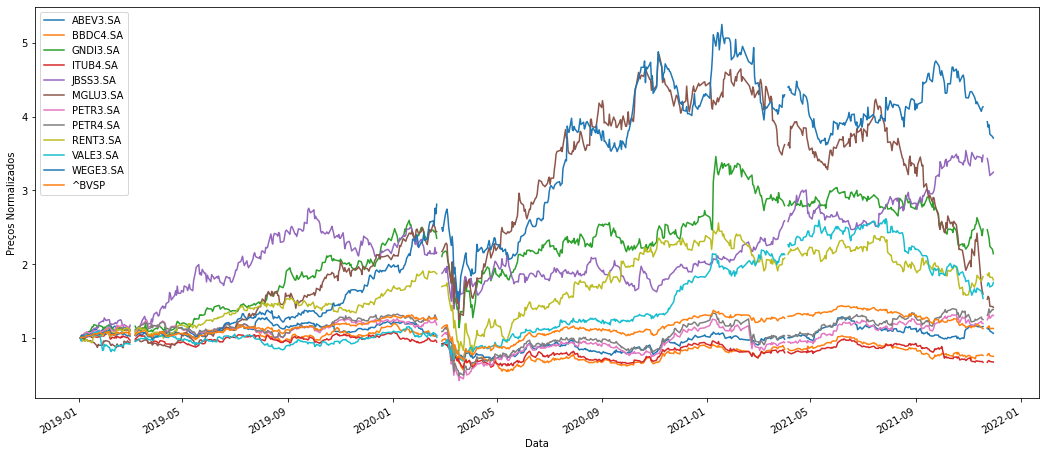

In [32]:
retorno_normalizados = (up/up.iloc[0])
retorno_normalizados.plot(figsize=(18,8))
plt.ylabel('Preços Normalizados')
plt.xlabel('Data')
plt.show()

In [33]:
carteira = 1000 * retorno_acumulado.iloc[:, :20]
carteira['Saldo'] = carteira.sum(axis=1) - carteira['^BVSP']
carteira['Retorno'] = carteira['Saldo'].pct_change()
carteira.tail()

,ABEV3.SA,BBDC4.SA,GNDI3.SA,ITUB4.SA,JBSS3.SA,MGLU3.SA,PETR3.SA,PETR4.SA,RENT3.SA,VALE3.SA,WEGE3.SA,^BVSP,Saldo,Retorno
Date,,,,,,,,,,,,,,
2021-11-24,1120.679914,782.331319,2407.517108,686.344270,3376.765878,1563.392261,1269.902370,1334.407896,1840.208946,1747.810608,3858.968359,1148.354063,19988.328928,-0.002395
2021-11-25,1129.199647,788.634465,2355.314284,692.599984,3293.883371,1542.121638,1322.363300,1393.202743,1883.368814,1735.991012,3890.042718,1162.604931,20026.721976,0.001921
2021-11-26,1093.809821,757.118735,2241.292083,679.492700,3201.688358,1428.678313,1264.699593,1339.111412,1822.457792,1690.190384,3762.292721,1123.917725,19280.831911,-0.037245
2021-11-29,1070.871904,751.557152,2199.735827,675.024324,3234.282483,1425.133124,1307.622195,1386.147289,1818.629078,1711.367026,3730.067655,1129.675208,19310.438058,0.001536
2021-11-30,1062.352045,748.961751,2141.007420,671.747489,3247.320132,1414.497812,1304.153704,1384.265901,1785.563069,1749.287987,3709.351416,1126.533623,19218.508727,-0.004761


# **Resultados**

### **O Índice de Sharpe ajuda a entender qual investimento oferece o maior retorno em relação ao risco assumido**

Start date,2019-01-02
End date,2021-11-30
Total months,33
,Backtest
Annual return,21.8%
Cumulative returns,74.714%
Annual volatility,32.96%
Sharpe ratio,0.77
Calmar ratio,0.47
Stability,0.81
Max drawdown,-46.744%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,46.74,2020-02-19,2020-03-18,2020-07-20,109
1,22.02,2021-01-08,2021-11-30,NaT,NaN
2,6.96,2019-03-19,2019-03-27,2019-04-23,26
3,6.75,2020-10-22,2020-10-30,2020-11-05,11
4,6.29,2020-09-01,2020-09-29,2020-10-08,28


Stress Events,mean,min,max
New Normal,0.10%,-15.93%,15.17%


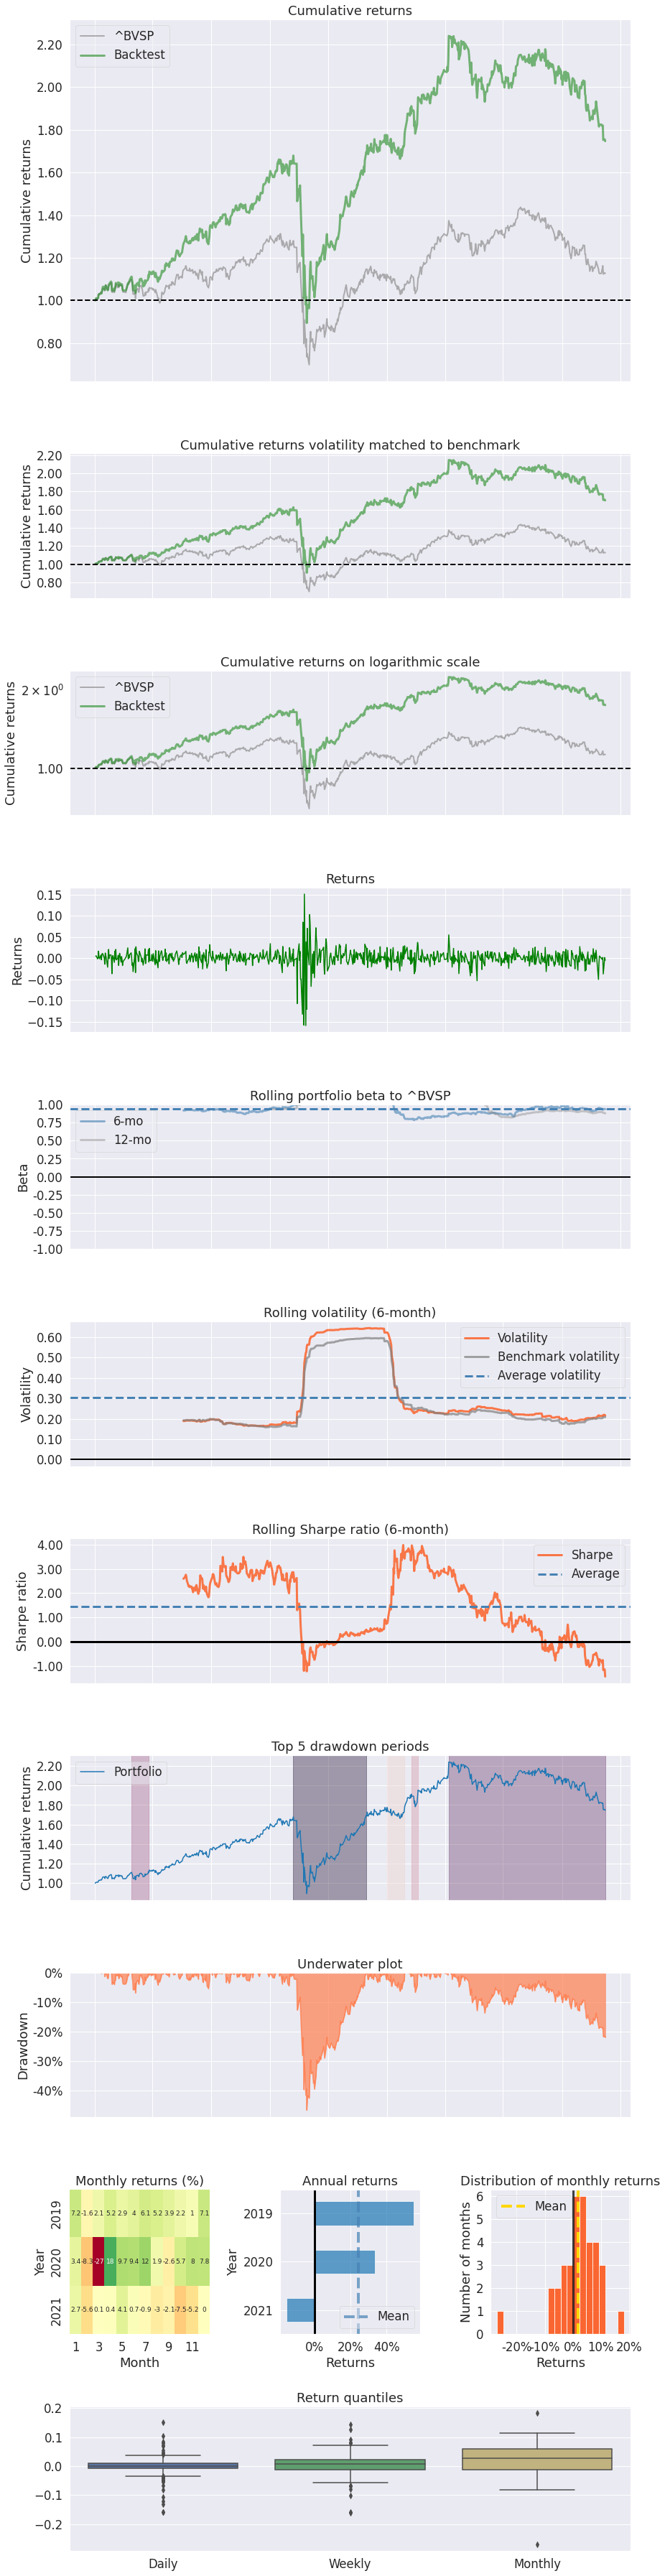

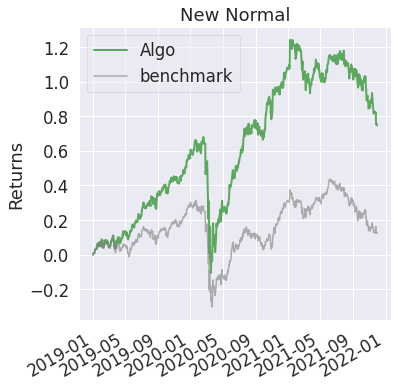

In [34]:
pf.create_full_tear_sheet(carteira['Retorno'], benchmark_rets=retorno['^BVSP'])

INDICE DE SHARP: Para cada 1 ponto de risco que o investidor correu no passado com o fundo X ele obteve um retorno de 0,1 pontos de rentabilidade acima daquela recebida se tivesse optado por um investimento livre de risco.

In [35]:
#instalando a biblioteca pyportfolio
!pip install pyportfolioopt

     |████████████████████████████████| 61 kB 3.4 MB/s 
     |████████████████████████████████| 2.8 MB 11.5 MB/s 
  Attempting uninstall: cvxpy
    Found existing installation: cvxpy 1.0.31
    Uninstalling cvxpy-1.0.31:
      Successfully uninstalled cvxpy-1.0.31


In [36]:
## importando alguns métodos (estimativa de covariancia , )
from pypfopt.risk_models import CovarianceShrinkage  #buscar covariâncias e reduzir os erros da previsão 
from pypfopt import plotting #plotar gráficos
from pypfopt import objective_functions #restrições 
from pypfopt import EfficientFrontier #utilização de um módulo dessa biblioteca (retornos esperados e matriz de covariância)
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import expected_returns
from pypfopt import risk_models

In [37]:
# Calculate expected returns and sample covariance
mu = expected_returns.mean_historical_return(retorno_acumulado)
S = risk_models.sample_cov(retorno_acumulado)

# Optimize for maximal Sharpe ratio
ef = EfficientFrontier(mu, S)
weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights() 
print(cleaned_weights) #Nota, os pesos podem ter algum erro de arredondamento, o que significa que eles podem não somar exatamente a 1, mas devem ser próximos
ef.portfolio_performance(verbose=True)

OrderedDict([('ABEV3.SA', 0.0), ('BBDC4.SA', 0.0), ('GNDI3.SA', 0.0), ('ITUB4.SA', 0.0), ('JBSS3.SA', 0.34058), ('MGLU3.SA', 0.0), ('PETR3.SA', 0.0), ('PETR4.SA', 0.0), ('RENT3.SA', 0.0), ('VALE3.SA', 0.0), ('WEGE3.SA', 0.65942), ('^BVSP', 0.0)])
Expected annual return: 56.5%
Annual volatility: 36.9%
Sharpe Ratio: 1.48


(0.5654404535775733, 0.36944863418247376, 1.476363432184664)

In [42]:
# obter a alocação discreta de cada ação
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices
latest_prices = get_latest_prices(up)
weights = cleaned_weights 
da = DiscreteAllocation(weights, latest_prices, total_portfolio_value=19218.50)
allocation, leftover = da.lp_portfolio()
print("Quantidade de ações:", allocation)
print("Fundo remanescente: ${:.2f}".format(leftover))

Quantidade de ações: {'JBSS3.SA': 187, 'WEGE3.SA': 393}
Fundo remanescente: $31.42


In [43]:
#Rebalanceamento com base no ultimo preço
Compra = (up['WEGE3.SA']*393 + up['JBSS3.SA']*187).tail(1)
Compra.round(2)

Date
2021-11-30    19187.08
dtype: float64

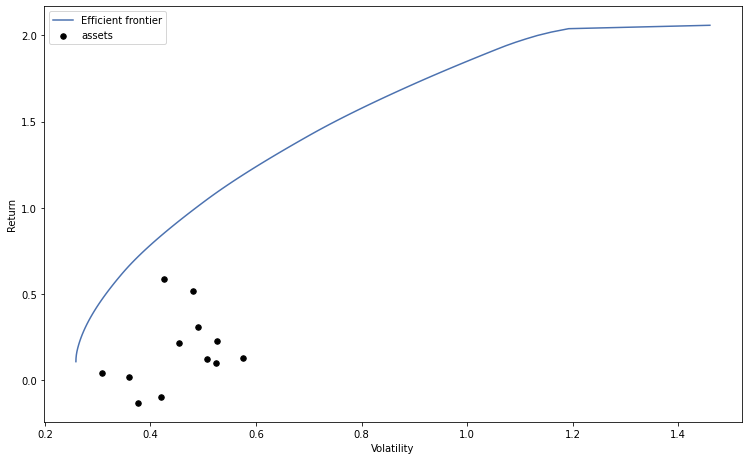

In [53]:
ef = EfficientFrontier(mu, S, weight_bounds=(None, None))

#ef.add_constraint(lambda w: w[0] >= 0.2)
#ef.add_constraint(lambda w: w[2] == 0.15)
#ef.add_constraint(lambda w: w[3] + w[4] <= 0.10)

fig, ax = plt.subplots()
plotting.plot_efficient_frontier(ef, ax=ax, show_assets=True)
plt.rcParams['figure.figsize'] = (10.5, 6.5)
plt.show()

In [59]:
# Optimize for maximum sharpe ratio
ef = EfficientFrontier(mu,S,weight_bounds=(None,None))
ef.add_constraint(lambda w: w[0]+w[1]+w[2]+w[3]+w[4]+w[5]+w[6]+w[7]+w[8]+w[9]+w[10] == 1)
ef.add_constraint(lambda w: w >= 0)
weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights() 
print(cleaned_weights)
ef.portfolio_performance(verbose=True)

OrderedDict([('ABEV3.SA', 0.0), ('BBDC4.SA', 0.0), ('GNDI3.SA', 0.0), ('ITUB4.SA', 0.0), ('JBSS3.SA', 0.34058), ('MGLU3.SA', 0.0), ('PETR3.SA', 0.0), ('PETR4.SA', 0.0), ('RENT3.SA', 0.0), ('VALE3.SA', 0.0), ('WEGE3.SA', 0.65942), ('^BVSP', 0.0)])
Expected annual return: 56.5%
Annual volatility: 36.9%
Sharpe Ratio: 1.48


(0.5654404535775733, 0.3694486341824738, 1.4763634321846637)

In [60]:
# Get the discrete allocation of each share per stock
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

latest_prices = get_latest_prices(up)
weights = cleaned_weights
da = DiscreteAllocation(weights,latest_prices,total_portfolio_value = 19218.50)

allocation,leftover = da.lp_portfolio()
print('Discrete allocation: ',allocation)
print('Funds remaining: ${:.2f}'.format(leftover))

Discrete allocation:  {'JBSS3.SA': 187, 'WEGE3.SA': 393}
Funds remaining: $31.42


In [70]:
from collections import OrderedDict

Um dado cliente exige aplicar:

(a) não mais que 25% do total em um único título

(b) no máximo 50% do total em títulos com alto risco

(c) mais de 50% do total em títulos com vencimento superior a 10 anos.

Para máxima rentabilidade, que percentual do total deve ser aplicado em cada título?

Identificando os elementos do problema
Variáveis de decisão

Percentual do total a ser aplicado em cada título

Função-Objetivo

(X) Max - Rentabilidade (ao ano) de todas as aplicações.

Restrições às variáveis

Exigências quanto a: diversificação, carência, segurança, investir a totalidade

Parâmetros

Caracterização de cada título: riscos, taxas de retorno, vencimentos.

In [71]:
prob = p.LpProblem('Rentabilidade', p.LpMaximize)

In [72]:
#Setando as variáveis de decisão
p1 = p.LpVariable('p1', lowBound=0)
p2 = p.LpVariable('p2', lowBound=0)
p3 = p.LpVariable('p3', lowBound=0)
p4 = p.LpVariable('p4', lowBound=0)
p5 = p.LpVariable('p5', lowBound=0)
p6 = p.LpVariable('p6', lowBound=0)

#Setando as taxas de retorno ao ano dos títulos
i1 = 0.087  #15 anos, Muito Baixo
i2 = 0.095  #12 anos, Regular
i3 = 0.120  #8 anos, Alto
i4 = 0.090  #7 anos, Baixo
i5 = 0.13   #11 anos, Alto
i6 = 0.200  #5 anos, Muito Alto

In [73]:
#Criando a função objetivo
prob += i1 * (p1*0.01) + i2 * (p2*0.01) + i3 * (p3*0.01) + i4 * (p4*0.01) + i5 * (p5*0.01) + i6 * (p6*0.01)

#Criando as restrições e parâmetros. 
prob += p1 + p2 + p3 + p4 + p5 + p6 ==1
prob += p1 <=0.25
prob += p2 <=0.25
prob += p3 <=0.25
prob += p4 <=0.25
prob += p5 <=0.25
prob += p6 <=0.25
prob += p3 + p5 + p6 <=0.5
prob += p1 + p2 + p5 >=0.5
prob += p1 >=0
prob += p2 >=0
prob += p3 >=0
prob += p4 >=0
prob += p5 >=0
prob += p6 >=0


In [74]:
#Resolvendo o Problema
status = prob.solve() 
print(p.LpStatus[status])
print(p.value(prob.objective))

#Exibindo a solução final

df = OrderedDict({
    'Título 1' :[p.value(p1)],
    'Título 2' :[p.value(p2)],
    'Título 3' :[p.value(p3)],
    'Título 4' :[p.value(p4)],
    'Título 5' :[p.value(p5)],
    'Título 6' :[p.value(p6)]
})

format_dict = {
    'Título 1': '{:.1%}',
    'Título 2': '{:.1%}',
    'Título 3': '{:.1%}',
    'Título 4': '{:.1%}',
    'Título 5': '{:.1%}',
    'Título 6': '{:.1%}',
}

df = pd.DataFrame(df)
df.style.format(format_dict).hide_index()



Optimal
0.0012875


Título 1,Título 2,Título 3,Título 4,Título 5,Título 6
0.0%,25.0%,0.0%,25.0%,25.0%,25.0%


Aqui, vamos colocar os títulos com os maiores rendimentos de 2020. E combase neles vamos criar as restrições e parâmetros do nosso modelo. 

In [75]:
prob = p.LpProblem('Rentabilidade', p.LpMaximize)

In [76]:
#Setando as variáveis de decisão
p1 = p.LpVariable('p1', lowBound=0)
p2 = p.LpVariable('p2', lowBound=0)
p3 = p.LpVariable('p3', lowBound=0)

#Setando as taxas de retorno ao ano dos título
i1 = 0.1781 #Retorno da carteira 1
i2 = 0.1741  #Retorno da carteira 2
i3 = 0.3845  #Retorno da carteira 3


In [77]:
#Criando a função objetivo
prob += i1 * (p1*0.33) + i2 * (p2*0.33) + i3 * (p3*0.33) 
#Criando as restrições e parâmetros. 
prob += p1 + p2 + p3 ==1
prob += p1 <=0.9
prob += p2 <=0.9
prob += p3 <=0.9
prob += p1 + p3 <=0.5
prob += p1 + p2 >=0.5
prob += p1 >=0
prob += p2 >=0
prob += p3 >=0


In [78]:
#Resolvendo o Problema
status = prob.solve() 
print(p.LpStatus[status])
print(p.value(prob.objective))

#Exibindo a solução final

df = OrderedDict({
    'Título 1' :[p.value(p1)],
    'Título 2' :[p.value(p2)],
    'Título 3' :[p.value(p3)]  
})

format_dict = {
    'Título 1': '{:.1%}',
    'Título 2': '{:.1%}',
    'Título 3': '{:.1%}'
}

df = pd.DataFrame(df)
df.style.format(format_dict).hide_index()

Optimal
0.092169


Título 1,Título 2,Título 3
0.0%,50.0%,50.0%


In [83]:
tickers = {'WEGE3.SA'}
acao = web.get_data_yahoo(tickers, start='2019-01-05')


[*********************100%***********************]  1 of 1 completed


In [84]:
acao

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-07,9.375000,9.380000,9.100000,9.155000,8.848323,5860200.0
2019-01-08,9.185000,9.215000,9.020000,9.080000,8.775837,6306800.0
2019-01-09,9.080000,9.235000,9.050000,9.180000,8.872487,7333400.0
2019-01-10,9.185000,9.295000,9.125000,9.250000,8.940143,7390600.0
2019-01-11,9.255000,9.385000,9.205000,9.345000,9.031962,18957600.0
...,...,...,...,...,...,...
2021-11-24,33.680000,34.029999,33.369999,33.529999,33.529999,6562700.0
2021-11-25,33.529999,34.320000,33.419998,33.799999,33.799999,4754200.0
2021-11-26,33.259998,33.400002,32.189999,32.689999,32.689999,6526100.0


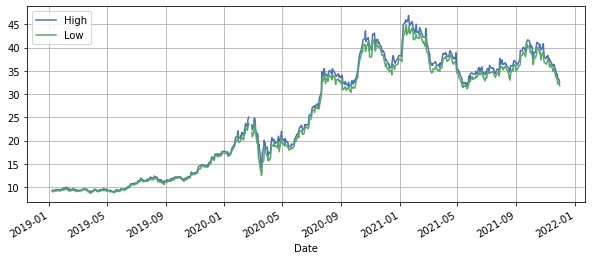

In [85]:
acao[['High', 'Low']].plot(figsize=(10, 4), grid=True)

In [86]:
# Média movel de 20 dias do Fechamento
acao['MovingMean22'] = acao.Close.rolling(22).mean()
# Média movel de 72 dias do Fechamento
acao['MovingMean72'] = acao.Close.rolling(72).mean()
# Média movel de 200 dias do Fechamento
acao['MovingMean200'] = acao.Close.rolling(200).mean()


In [87]:
acao

,Open,High,Low,Close,Adj Close,Volume,MovingMean22,MovingMean72,MovingMean200
Date,,,,,,,,,
2019-01-07,9.375000,9.380000,9.100000,9.155000,8.848323,5860200.0,NaN,NaN,NaN
2019-01-08,9.185000,9.215000,9.020000,9.080000,8.775837,6306800.0,NaN,NaN,NaN
2019-01-09,9.080000,9.235000,9.050000,9.180000,8.872487,7333400.0,NaN,NaN,NaN
2019-01-10,9.185000,9.295000,9.125000,9.250000,8.940143,7390600.0,NaN,NaN,NaN
2019-01-11,9.255000,9.385000,9.205000,9.345000,9.031962,18957600.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2021-11-24,33.680000,34.029999,33.369999,33.529999,33.529999,6562700.0,37.382727,37.712917,37.004825
2021-11-25,33.529999,34.320000,33.419998,33.799999,33.799999,4754200.0,37.130454,37.684306,36.952075
2021-11-26,33.259998,33.400002,32.189999,32.689999,32.689999,6526100.0,36.792727,37.635000,36.896400


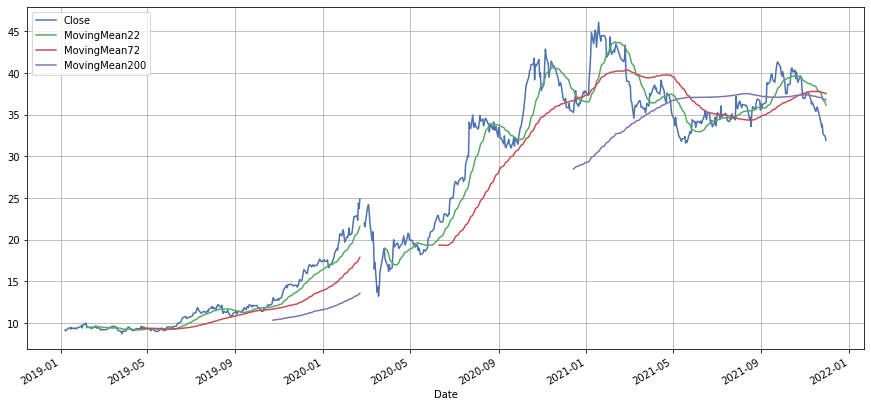

In [88]:
columns = ['Close','MovingMean22', 'MovingMean72', 'MovingMean200']
graph = acao[columns].plot(figsize=(15, 7), grid=True)

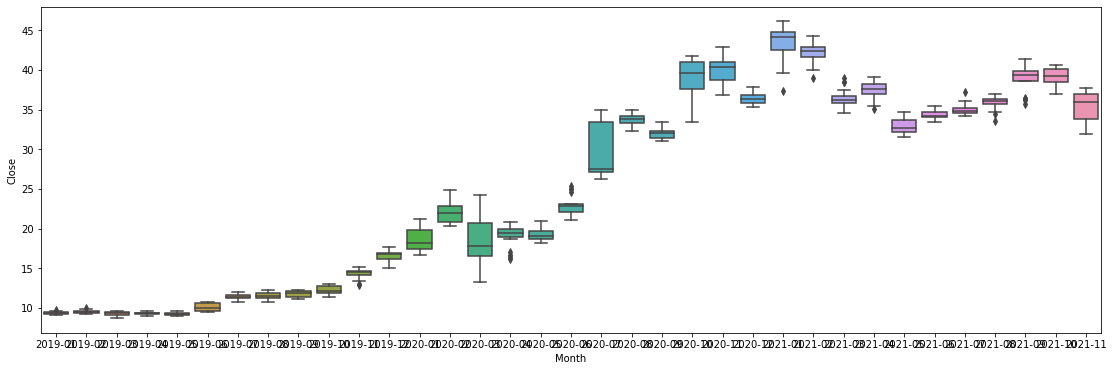

In [90]:
fig, ax1 = plt.subplots(1, 1, figsize=(19, 6))
acao['Month'] = acao.index.to_period('M')
sns.boxplot('Month', 'Close', data=acao, ax=ax1)

In [91]:
#instalando a biblioteca investpy
!pip install investpy

#instalando a biblioteca numpay financial
!pip install numpyfinancial

#instalando a biblioteca quandl - Dados Macroeconomicos
!pip install quandl

#Back teste das estratégias
!pip install backtrader

     |████████████████████████████████| 4.4 MB 5.3 MB/s 
     |████████████████████████████████| 235 kB 57.0 MB/s 
     |████████████████████████████████| 503 kB 49.3 MB/s 
     |████████████████████████████████| 127 kB 51.4 MB/s 
  Created wheel for investpy: filename=investpy-1.0.7-py3-none-any.whl size=4495221 sha256=2da05347283aa4b9b5754535ba781b50c4dc78f1e08c2f8e7926689dffba8179
  Stored in directory: /root/.cache/pip/wheels/50/bb/ee/760eeb6cc7ed8efc1b1b23b13b6b9f17fb1ed530fb04bd16f5
Successfully built investpy
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.26.7
    Uninstalling urllib3-1.26.7:
      Successfully uninstalled urllib3-1.26.7
  Attempting uninstall: pytz
    Found existing installation: pytz 2018.9
    Uninstalling pytz-2018.9:
      Successfully uninstalled pytz-2018.9
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflict

ERROR: Could not find a version that satisfies the requirement numpyfinancial (from versions: none)
ERROR: No matching distribution found for numpyfinancial
     |████████████████████████████████| 410 kB 5.4 MB/s 


In [92]:
import quandl


## Chave API


In [93]:
quandl.ApiConfig.api_key = '658nsbb_irvyrCRsfTzE'

## 1. Buscar a Taxa Selic

In [94]:
selic = quandl.get('BCB/4189', start_date='2019-01-01')
selic

,Value
Date,
2019-01-31,6.40
2019-02-28,6.40
2019-03-31,6.40
2019-04-30,6.40
2019-05-31,6.40
2019-06-30,6.40
2019-07-31,6.40
2019-08-31,5.90
2019-09-30,5.71


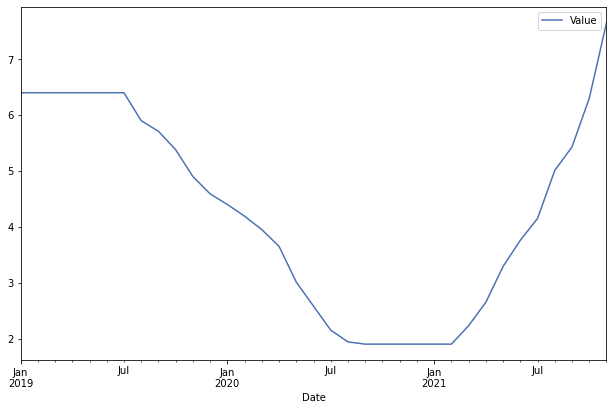

In [95]:
selic.plot()

## 2. Buscar IPCA

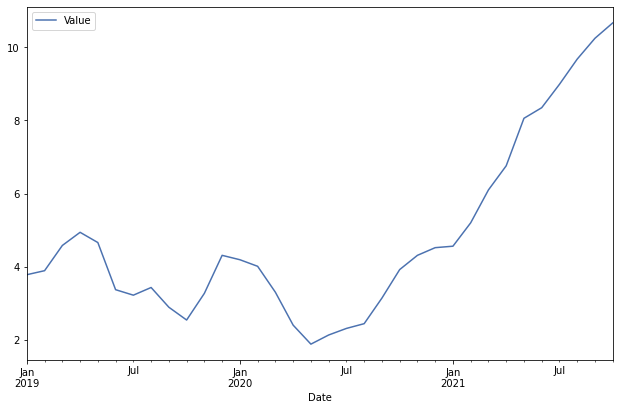

In [97]:
ipca = quandl.get('BCB/13522', start_date='2019-01-01')
ipca.plot()

In [99]:
ipca.tail()

,Value
Date,
2021-06-30,8.35
2021-07-31,8.99
2021-08-31,9.68
2021-09-30,10.25
2021-10-31,10.67


## 3. CDI

In [100]:
cdi = quandl.get('BCB/4392', start_date='2019-01-01')
cdi.tail()

,Value
Date,
2021-07-31,4.15
2021-08-31,5.01
2021-09-30,5.43
2021-10-31,6.30
2021-11-30,7.65


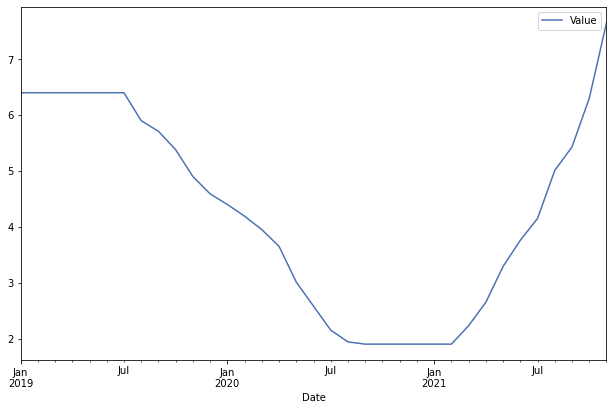

In [101]:
cdi.plot()

## 4. Dólar

In [102]:
dolar = quandl.get('BCB/10813', start_date='2019-01-01')
dolar.tail()

,Value
Date,
2021-11-23,5.6450
2021-11-24,5.6021
2021-11-25,5.5734
2021-11-26,5.5859
2021-11-29,5.6112


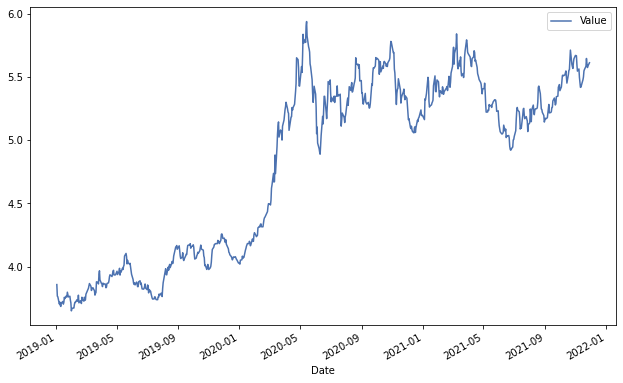

In [103]:
dolar.plot()

## 5. PIB

In [104]:
pib = quandl.get('ODA/BRA_NGDPD', start_date='2019-01-01')
pib

,Value
Date,
2019-12-31,1960.19
2020-12-31,2062.50
2021-12-31,2156.50
2022-12-31,2255.58
2023-12-31,2359.53
2024-12-31,2468.22


##6. IBOV

In [105]:
ibov = quandl.get('BCB/7', start_date='2019-01-01')
ibov

,Value
Date,
2019-01-02,91012.0
2019-01-03,91564.0
2019-01-04,91840.0
2019-01-07,91699.0
2019-01-08,92031.0
...,...
2019-09-24,103875.0
2019-09-25,104480.0
2019-09-26,105319.0


## 7.PETRÓLEO

In [106]:
petroleo = quandl.get('EIA/PET_RWTC_D', start_date='2019-01-01')
petroleo

,Value
Date,
2019-01-02,46.31
2019-01-03,46.92
2019-01-04,47.76
2019-01-07,48.27
2019-01-08,49.58
...,...
2021-11-16,80.76
2021-11-17,78.32
2021-11-18,78.92
